## 今天的範例，帶大家運用python 裡面的套件
* 如何模擬這些分配的樣本點
* 進行一些機率的運算

包含以下離散型分配        

1. 離散均勻分配 ( Discrete Uniform Distribution )     
2. 伯努利分配 ( Bernoulli Distribution )    
3. 二項分配 ( Binomial Distribution )   


In [1]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics

---
## 1. 離散均勻分配( Discrete Uniform Distribution )

* 離散均勻分配 (Discrete Uniform Distribution)
* 前提：其中有限個數值擁有相同的機率。

### 1. 定義離散均勻分配的基本資訊

In [3]:
low = 1
high = 7
r = np.arange(low, high)

### 2. 計算離散均勻分配的概率質量分佈 (probability mass function, PMF)
* 之所以稱為質量，是因為離散的點
* 產生 x 軸的點
  
  ```python
    r = np.arange(stats.randint.ppf(0.01, low, high),
                  stats.randint.ppf(0.99, low, high), 1)
  ```

[1 2 3 4 5 6]
[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


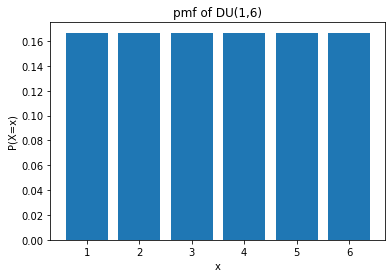

In [4]:
print(r)

# P(X=x) --> 是機率
probs = stats.randint.pmf(r, low, high)
print(probs)

plt.bar(r, probs)
plt.ylabel('P(X=x)')
plt.xlabel('x')
plt.title('pmf of DU(1,6)')
plt.show()

### 3. 計算離散均勻分配的累積機率 (cumulative density function, CDF)
* 即 pmf 的累加
* P(X=x) --> 是機率

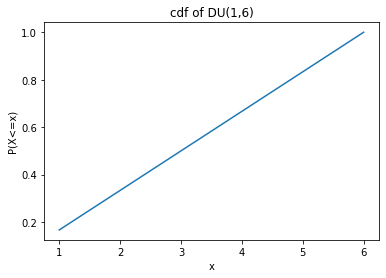

In [5]:
cumsum_probs = stats.randint.cdf(r, low,high)
plt.ylabel('P(X<=x)')
plt.xlabel('x')
plt.title('cdf of DU(1,6)')
plt.plot(r, cumsum_probs)
plt.show()

### 4.透過 CDF ，給定一個機率值，反推出對應到的 x

In [7]:
k = stats.randint.ppf(cumsum_probs, low, high)
print(k)
#看上圖看結果

[1. 2. 3. 4. 5. 6.]


### 5.產生符合隨機樣本點 (random sample)

[1 6 3 3 4 4 2 2 6 2 4 3 3 1 2 6 5 5 5 6]


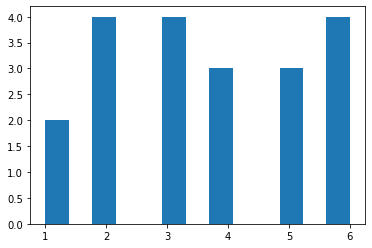

In [11]:
X = stats.randint.rvs(low, high, size=20)
print(X)
plt.hist(X, bins=13)
plt.show()
#試試看，，每一次的結果一樣嗎? #每次不同

### 6. 計算固定參數下，隨機變數的平均數、變異數、偏度和峰度

In [13]:
stat_randint = stats.randint.stats(low, high, moments='mvks')
print(stat_randint)
print(type(stat_randint))
print("randint mean =", float(stat_randint[0]))
print("randint variance =", float(stat_randint[1]))
print("randint kurtosis =", float(stat_randint[2]))
print("randint skew =", float(stat_randint[3]))

(array(3.5), array(2.91666667), array(0.), array(-1.26857143))
<class 'tuple'>
randint mean = 3.5
randint variance = 2.9166666666666665
randint kurtosis = 0.0
randint skew = -1.2685714285714285


---
## 2. 伯努利分配( Bernoulli Distribution )

* 伯努利分配 ( Bernoulli Distribution )
* 前提：是只有兩種可能結果（成功或失敗）的單次隨機試驗，成功的機率為 p

### 1. 定義伯努利分配基本資訊

In [22]:
# 事件A 機率 0.4
p = 0.4 

# 可以出現的範圍為 0、1、2種可能出現的結果
r = np.arange(0, 2) 

### 2. 計算伯努利分配的概率質量分佈 (probability mass function)
* 之所以稱為質量，是因為離散的點
* P(X=x) --> 是機率

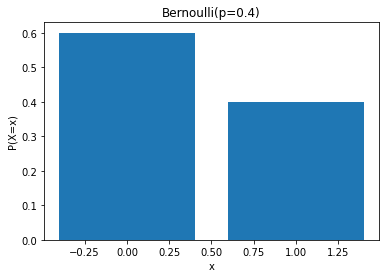

In [23]:
probs = stats.bernoulli.pmf(r, p)
#array([ 0.07776, 0.2592 , 0.3456 , 0.2304 , 0.0768 , 0.01024])
plt.bar(r, probs)
plt.ylabel('P(X=x)')
plt.xlabel('x')
plt.title('Bernoulli(p=0.4)')
plt.show()

### 3. 計算伯努利分配的累積機率 (cumulative density function)，pmf 的累加
* P(X=x) --> 是機率

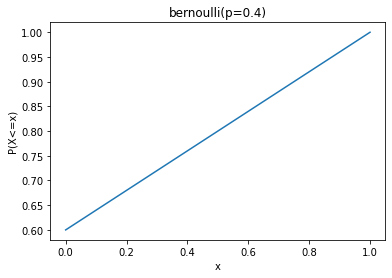

In [24]:
cumsum_probs = stats.bernoulli.cdf(r,p)
plt.ylabel('P(X<=x)')
plt.xlabel('x')
plt.title('bernoulli(p=0.4)')
plt.plot(r, cumsum_probs)
plt.show()

### 4. 透過 cdf ，給定一個 機率值，反推出對應到的 x

In [25]:
p_loc = stats.bernoulli.ppf(cumsum_probs, p)
print(p_loc)
#看上圖看結果

[0. 1.]


### 5. 產生符合伯努利分配的隨機樣本點 (random sample)

[1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1]


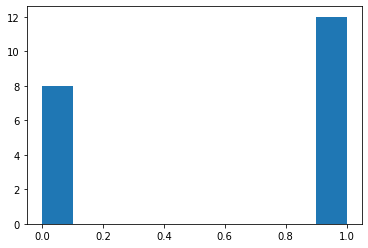

In [26]:
X = stats.bernoulli.rvs(p,size=20)
print(X)
plt.hist(X)
plt.show()
#試試看，每一次的結果一樣嗎?

### 6. 計算固定參數下，隨機變數的平均數、變異數、偏度和峰度

In [28]:
stat_ber = stats.bernoulli.stats(p, moments='mvks')
print(stat_ber)
print(type(stat_ber))
#E(X)
print("bernoulli mean =", float(stat_ber[0]))
print("bernoulli variance =", float(stat_ber[1]))
print("bernoulli kurtosis =", float(stat_ber[2]))
print("bernoulli skew =", float(stat_ber[3]))

(array(0.4), array(0.24), array(0.40824829), array(-1.83333333))
<class 'tuple'>
bernoulli mean = 0.4
bernoulli variance = 0.24
bernoulli kurtosis = 0.40824829046386296
bernoulli skew = -1.8333333333333337


---
## 3. 二項分配(Binomial Distribution)

* 二項分佈 (binomial distribution)
* 前提：獨立重複試驗、有放回、只有兩個結果
* 二項分佈指出，隨機一次試驗出現事件A的機率如果為p，那麼在重複 n 次試驗中出現 x 次事件A的機率為：
$$f(n, x, p) = choose(n, x) \times p^x \times (1-p)^{n-x}$$

### 1. 定義二項分佈的基本資訊

In [34]:
# 事件 A: 機率 0.5
p = 0.5 

# 重複實驗 5 次
n = 5

# 可以出現的範圍為 0, 1, 2,..., 5 --> 6種可能出現的結果
r = np.arange(0, 6)

print(r)

[0 1 2 3 4 5]


### 2. 計算二項分佈的概率質量分佈 (probability mass function)
* 之所以稱為質量，是因為離散的點
* P(X=x) --> 是機率

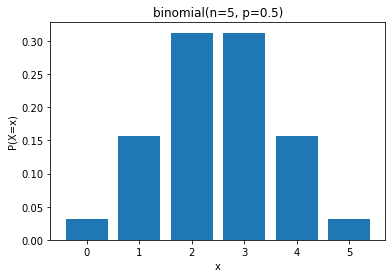

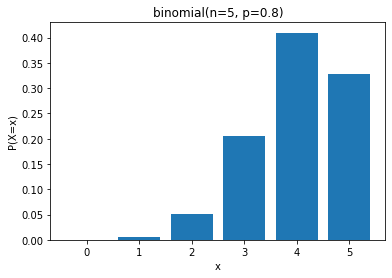

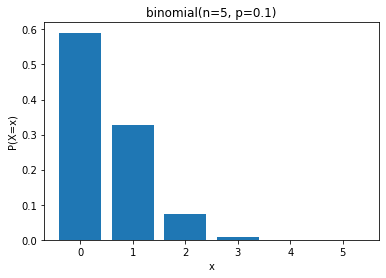

In [39]:
probs = stats.binom.pmf(r, n, p)
#array([ 0.07776, 0.2592 , 0.3456 , 0.2304 , 0.0768 , 0.01024])
plt.bar(r, probs)
plt.ylabel('P(X=x)')
plt.xlabel('x')
plt.title('binomial(n=5, p=0.5)')
plt.show()

#學生額外小練習: 可以調整 p 的不同值
# p 接近於 1 時，p=0.5
# p 接近於 0時，看 pmf 的變化

probs = stats.binom.pmf(r, n, 0.8)
#array([ 0.07776, 0.2592 , 0.3456 , 0.2304 , 0.0768 , 0.01024])
plt.bar(r, probs)
plt.ylabel('P(X=x)')
plt.xlabel('x')
plt.title('binomial(n=5, p=0.8)')
plt.show()

probs = stats.binom.pmf(r, n, 0.1)
#array([ 0.07776, 0.2592 , 0.3456 , 0.2304 , 0.0768 , 0.01024])
plt.bar(r, probs)
plt.ylabel('P(X=x)')
plt.xlabel('x')
plt.title('binomial(n=5, p=0.1)')
plt.show()

### 3. 計算二項分佈的累積機率 (cumulative density function)，pmf 的累加
* 之所以稱為質量，是因為離散的點，預設體積（即寬度）為 1
* P(X=x) --> 是機率

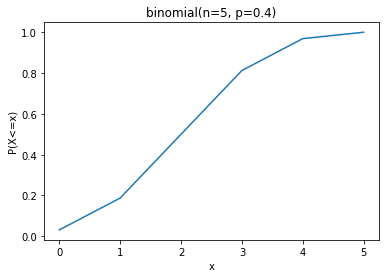

In [41]:
cumsum_probs = stats.binom.cdf(r, n, p)
#array([ 0.07776, 0.2592 , 0.3456 , 0.2304 , 0.0768 , 0.01024])
plt.show()
plt.ylabel('P(X<=x)')
plt.xlabel('x')
plt.title('binomial(n=5, p=0.4)')
plt.plot(r, cumsum_probs)
plt.show()

### 4. 透過 cdf ，給定一個 機率值，反推出對應到的 x

In [42]:
p_loc= stats.binom.ppf(cumsum_probs, n, p)
print(p_loc)
#看上圖看結果

[0. 1. 2. 3. 4. 5.]


### 5. 產生符合二項分佈的隨機樣本點 (random sample)

[3 3 3 2 3 2 3 1 1 3 2 1 1 0 2 1 4 2 0 1]


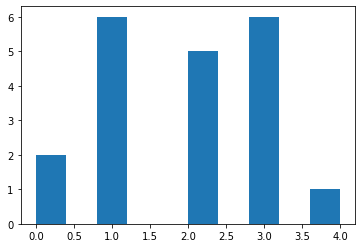

In [44]:
X = stats.binom.rvs(n,p,size=20)
#array([2, 3, 1, 2, 2, 2, 1, 2, 2, 3, 3, 0, 1, 1, 1, 2, 3, 4, 0, 3])
print(X)
plt.hist(X)
plt.show()
#試試看，，每一次的結果一樣嗎?

### 6. 計算固定參數下，隨機變數的平均數、變異數、偏度和峰度

In [45]:
stat_bin = stats.binom.stats(n, p, moments='mvks')
print(stat_bin)
print(type(stat_bin))
#E(X)
print("binomial mean=", float(stat_bin[0]))
print("binomial variance=", float(stat_bin[1]))
print("binomial kurtosis=", float(stat_bin[2]))
print("binomial skew=", float(stat_bin[3]))

(array(2.5), array(1.25), array(0.), array(-0.4))
<class 'tuple'>
binomial mean= 2.5
binomial variance= 1.25
binomial kurtosis= 0.0
binomial skew= -0.4
